Question 1

$$
P(\text{Pass}) = 0.9
$$  

$$  
P(\text{Quick} \mid \text{Pass}) = 0.6
$$

$$
P(\text{Quick} \mid \text{Fail}) = 0.3
$$

$$
P(\text{Not Pass}) = 0.1
$$


$$
$$


$$
P(\text{Quick}) = P(\text{Quick} \mid \text{Pass}) P(\text{Pass}) + P(\text{Quick} \mid \text{Fail}) P(\text{Not Pass})
$$

$$
$$


$$
P(\text{Quick}) = (0.6 \cdot 0.9) + (0.3 \cdot 0.1) = 0.54 + 0.03 = 0.57
$$

$$
$$


$$
P(\text{Pass} \mid \text{Quick}) = \frac{P(\text{Quick} \mid \text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})}
$$

$$
$$


$$
P(\text{Pass} \mid \text{Quick}) = \frac{(0.6 \cdot 0.9)}{0.57} = \frac{0.54}{0.57} \approx 0.947
$$



Question 2

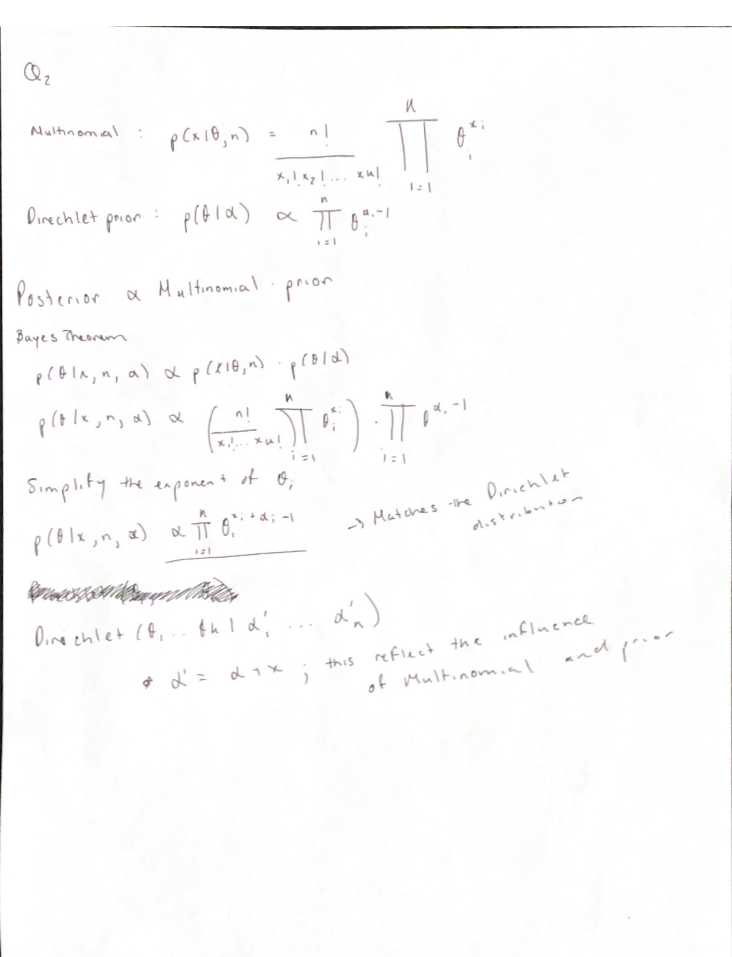

Question 3

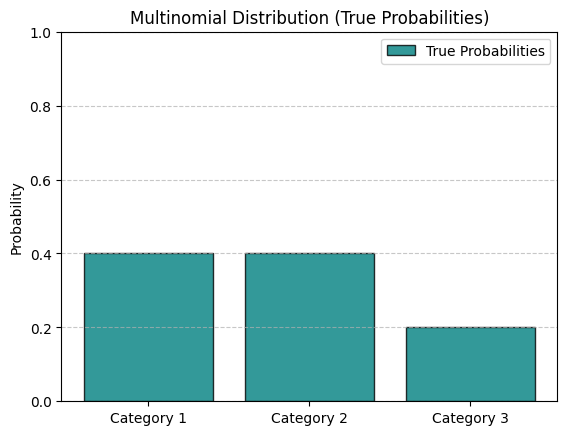

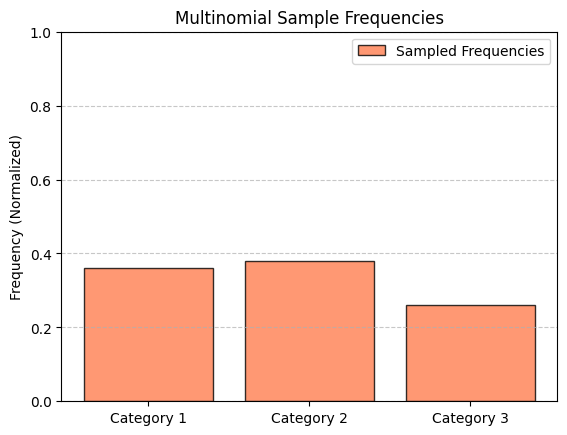

In [21]:
!pip install -U plotly

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.io as pio


# Multinomial Sampling
n_trials = 100
category_probabilities = np.array([0.4, 0.4, 0.2])
sample = np.random.multinomial(n_trials, category_probabilities)

# Visualize True Probabilities
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, category_probabilities, alpha=0.8, color='teal', edgecolor='black', label='True Probabilities')
plt.ylabel('Probability')
plt.title('Multinomial Distribution (True Probabilities)')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Sampled Frequencies
normalized_frequencies = sample / n_trials
plt.bar(categories, normalized_frequencies, alpha=0.8, color='coral', edgecolor='black', label='Sampled Frequencies')
plt.ylabel('Frequency (Normalized)')
plt.title('Multinomial Sample Frequencies')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
p1 = np.linspace(0, 1, n)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, n)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]


alpha_prior = np.array([1.1,1.1, 1.1])
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

alpha_posterior = np.array([1.1, 1.1, 1.1]) + sample
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

prior_densities = dirichlet_prior.pdf(p.T)
posterior_densities = dirichlet_posterior.pdf(p.T)


# Create Dirichlet prior plot
fig_prior = ff.create_ternary_contour(
    p.T,
    prior_densities,
    showscale=True,
)

fig_prior.update_layout(title_text="Dirichlet Prior")

pio.show(fig_prior)

# Create Dirichlet posterior
fig_posterior = ff.create_ternary_contour(
    p.T,
    posterior_densities,
    showscale=True,
)

fig_posterior.update_layout(title_text="Dirichlet Posterior")

pio.show(fig_posterior)

